# Learning performance of SAC and DSAC

In [4]:
from visualization.utils import wandb2df, make_defaults
import pandas as pd
from helpers.paths import Path
import seaborn as sns
import matplotlib.pyplot as plt
make_defaults()

## Citation

In [5]:
df_sac = wandb2df(pd.read_csv(Path().data / 'sac-learning.csv'), "sac_train/steps")
df_dsac = wandb2df(pd.read_csv(Path().data / 'dsac-learning.csv'), "sac_train/steps")

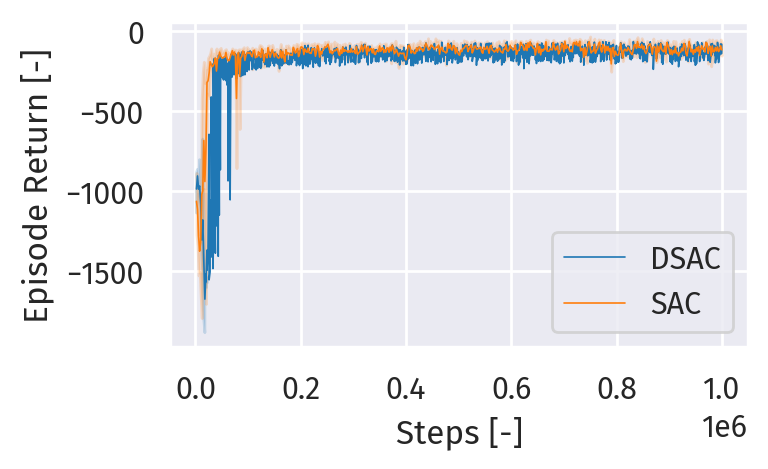

In [23]:
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=200)
sns.lineplot(data=df_dsac, x="steps", y="episode_return", ax=ax, label="DSAC", linewidth=.6)
sns.lineplot(data=df_sac, x="steps", y="episode_return", ax=ax, label="SAC", linewidth=.6)
ax.set_xlabel("Steps [-]")
ax.set_ylabel("Episode Return [-]")
plt.tight_layout()

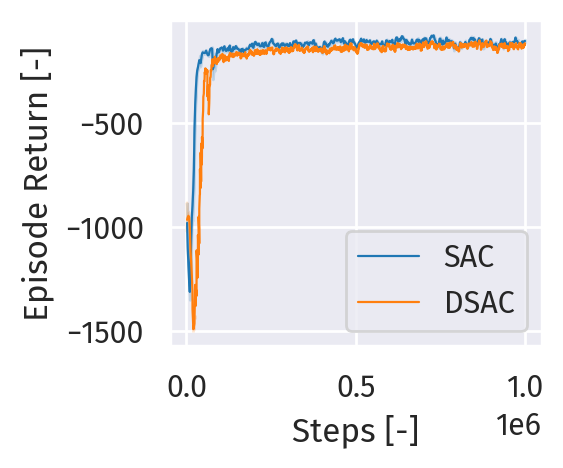

In [48]:
df_sac_smooth = df_sac.set_index("steps")['episode_return'].ewm(span = 10).mean()
df_dsac_smooth = df_dsac.set_index("steps")['episode_return'].ewm(span = 10).mean()

fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)
sns.lineplot(data=df_sac_smooth, ax=ax, label="SAC", linewidth=.8)
sns.lineplot(data=df_dsac_smooth, ax=ax, label="DSAC", linewidth=.8)

ax.set_xlabel("Steps [-]")
ax.set_ylabel("Episode Return [-]")
plt.tight_layout()

if True:
    plt.savefig(f"{str(Path().paper_figures)}/sac-dsac-learning-performance.pdf", bbox_inches='tight')

## Verification

In [6]:
df_sac_verification = wandb2df(pd.read_csv(Path().data / 'verification-sac.csv'), "sac_train/steps")
df_sac_openai_verification = wandb2df(pd.read_csv(Path().data / 'verification-sac-openai.csv'), "train/step")
df_dsac_verification = wandb2df(pd.read_csv(Path().data / 'verification-dsac.csv'), "sac_train/steps")

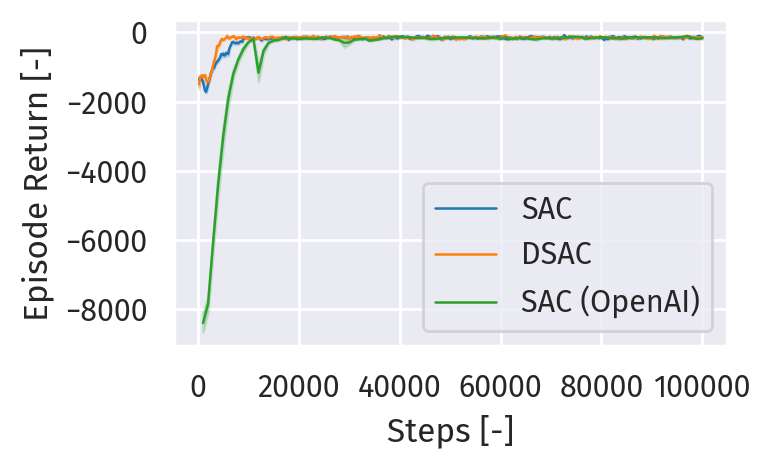

In [7]:
df_sac_smooth = df_sac_verification.set_index("steps")['episode_return'].ewm(span = 10).mean()
df_sac_openai_smooth = df_sac_openai_verification.set_index("step")['return'].ewm(span = 10).mean()
df_dsac_smooth = df_dsac_verification.set_index("steps")['episode_return'].ewm(span = 10).mean()

fig, ax = plt.subplots(figsize=(4, 2.5), dpi=200)

sns.lineplot(data=df_sac_smooth, ax=ax, label="SAC", linewidth=.9)
sns.lineplot(data=df_dsac_smooth, ax=ax, label="DSAC", linewidth=.9)
sns.lineplot(data=df_sac_openai_smooth, ax=ax, label="SAC (OpenAI)", linewidth=.9)

ax.set_xlabel("Steps [-]")
ax.set_ylabel("Episode Return [-]")
plt.tight_layout()

if True:
    plt.savefig(f"{str(Path().paper_figures)}/sac-dsac-verification.pdf", bbox_inches='tight')